In [1]:
from sklearn.datasets import make_blobs
import numpy as np
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [2]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit(X)
print(kmeans.labels_)

[4 2 1 ... 0 1 2]


In [3]:
X_new = np.array([[0,2], [3,2], [-3,3],[-3,2.5]])

In [4]:
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

In [5]:
# this gives distance to new centriod.
# it can be used as a dimensionallity technique
kmeans.transform(X_new)

array([[2.9042344 , 0.32995317, 2.81093633, 1.49439034, 2.88633901],
       [5.84739223, 2.80290755, 5.80730058, 4.4759332 , 5.84236351],
       [0.29040966, 3.29399768, 1.21475352, 1.69136631, 1.71086031],
       [0.36159148, 3.21806371, 0.72581411, 1.54808703, 1.21567622]])

In [6]:
# setting up the centriods
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [7]:
kmeans.transform(X_new)

array([[2.90252066, 2.81093633, 2.88633901, 1.48858201, 0.33143587],
       [5.84579722, 5.80730058, 5.84236351, 4.46986157, 2.79863242],
       [0.29226049, 1.21475352, 1.71086031, 1.69642736, 3.29838701],
       [0.36147155, 0.72581411, 1.21567622, 1.55401997, 3.2223216 ]])

In [8]:
kmeans.inertia_

211.62337889822365

In [9]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)
minibatch_kmeans.transform(X_new)

array([[0.34806042, 2.91059964, 2.88923481, 1.48794568, 2.80691208],
       [2.78747347, 5.85455116, 5.84557506, 4.46952139, 5.80321725],
       [3.30779221, 0.28787888, 1.70852854, 1.69758352, 1.21680181],
       [3.23371095, 0.35375527, 1.21319363, 1.55453096, 0.7282812 ]])

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

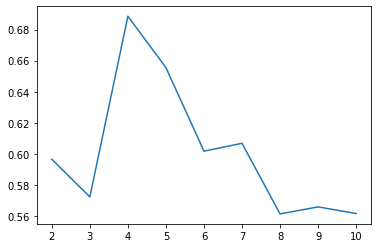

In [11]:
import matplotlib.pyplot as plt
scores = []
k_list = range(2,11)
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X,kmeans.labels_))
plt.plot(k_list,scores)

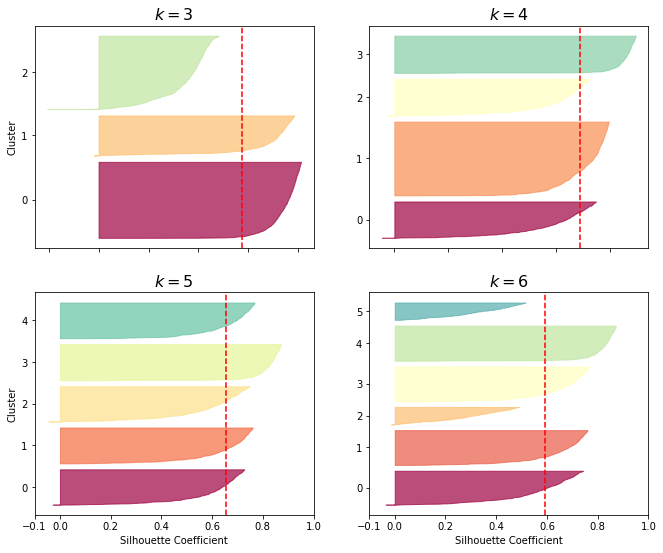

In [12]:
# make silhouette diagram
# code addapted from https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score(X,kmeans.labels_), color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


In [13]:
from matplotlib.image import imread
image = imread('ladybug.png')
image.shape
X = image.reshape(-1,3)

k=2


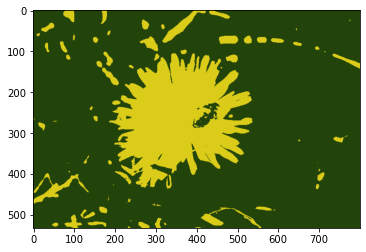

k=3


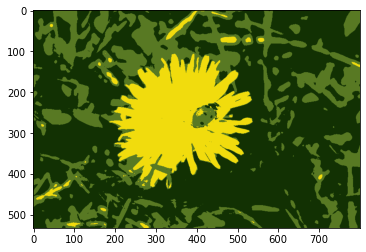

k=4


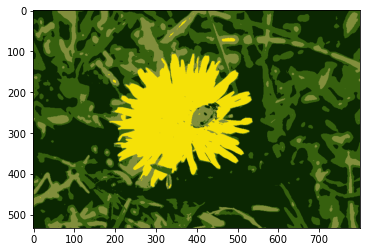

k=5


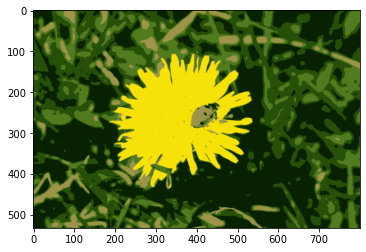

k=6


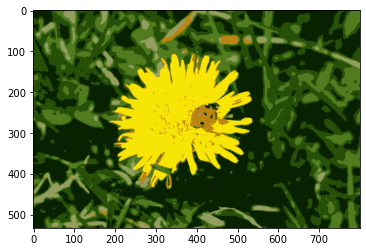

k=7


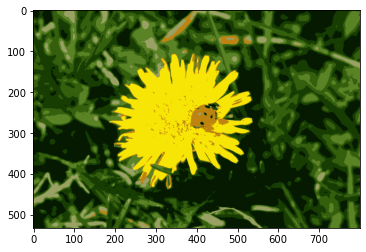

k=8


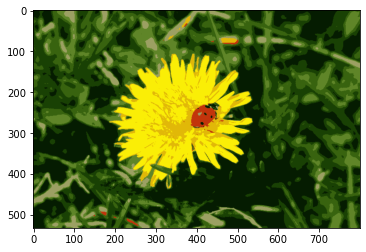

k=9


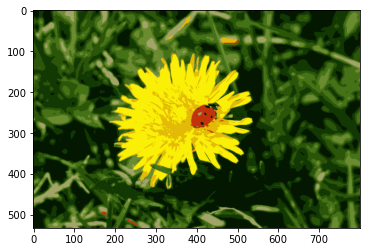

k=10


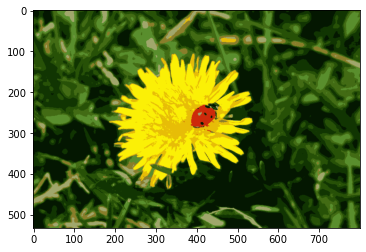

k=11


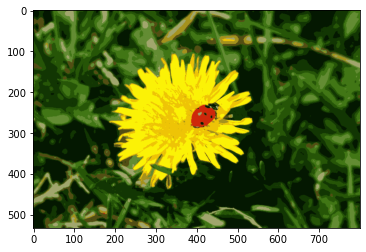

k=12


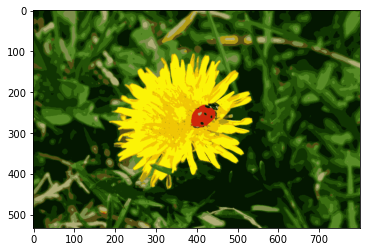

k=13


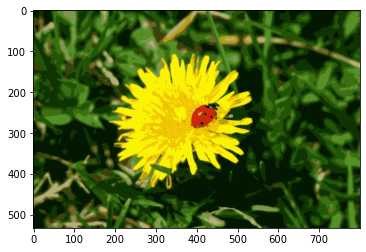

k=14


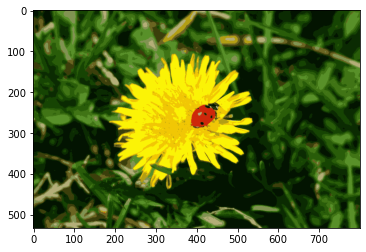

In [14]:
# this is taking each pixle as a training instance
# the color is then set to the average color for that 'cluster'
for k in range(2,15,1):
    print('k={}'.format(k))
    kmeans = KMeans(n_clusters=k).fit(X)
    segmented_imag = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imag = segmented_imag.reshape(image.shape)
    plt.imshow(segmented_imag)
    plt.show()

In [15]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [17]:
# train basic linear reg on digits dataset
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [18]:
# baseline of 95.7%
log_reg.score(X_test, y_test)

0.9644444444444444

In [19]:
# use kmeans to preprocess reducing the dimensionallity
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters = 50)),
    ('log_reg', LogisticRegression(max_iter=100000)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=100000))])

In [20]:
pipeline.score(X_test, y_test)

0.9688888888888889

In [21]:
# now use grid search to find the best number of clusters
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2,101,2))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.2min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000))]),
             n_jobs=-1, param_grid={'kmeans__n_clusters': range(2, 101, 2)},
             verbose=2)

In [22]:
grid_clf.best_params_

{'kmeans__n_clusters': 70}

In [23]:
grid_clf.score(X_test, y_test)

0.9666666666666667

In [24]:
n_labeled = 50
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.8333333333333334

In [25]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
represenative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_represenative_digits = X_train[represenative_digit_idx]

3


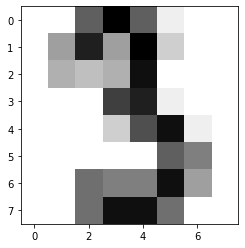

8


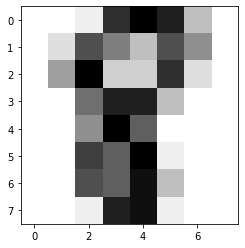

0


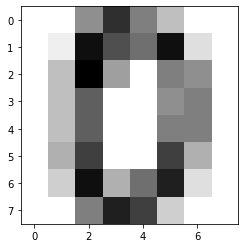

4


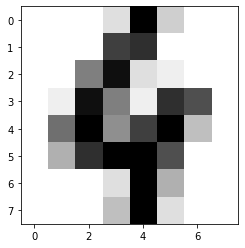

8


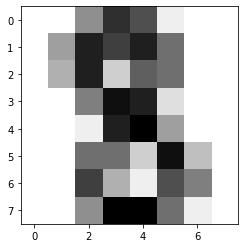

7


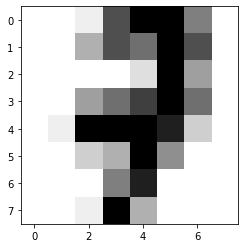

2


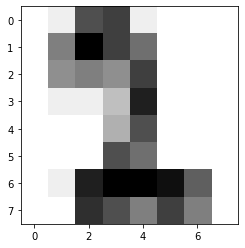

6


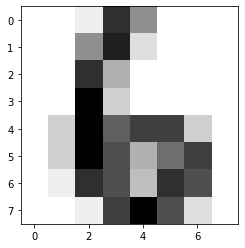

7


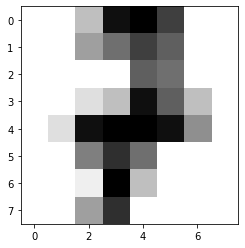

9


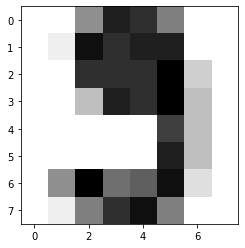

1


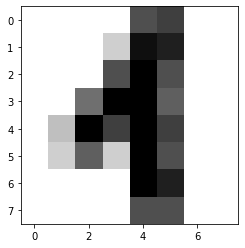

5


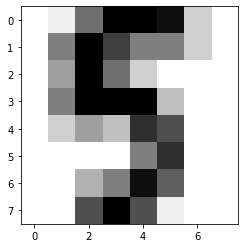

4


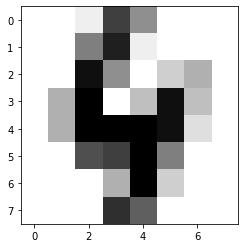

6


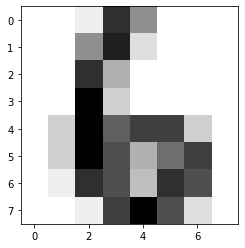

1


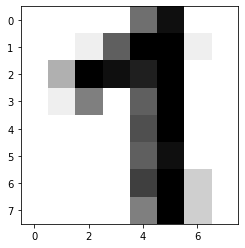

8


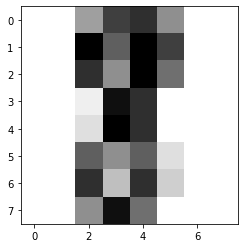

9


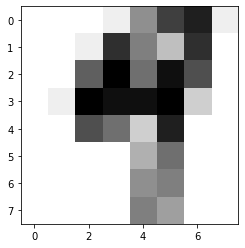

0


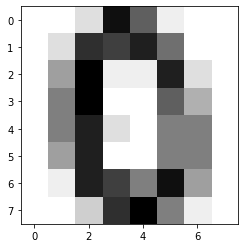

2


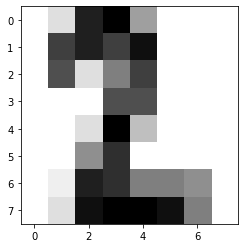

5


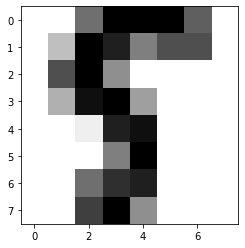

4


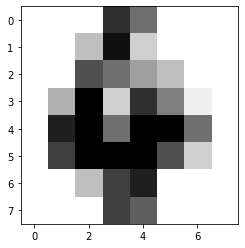

1


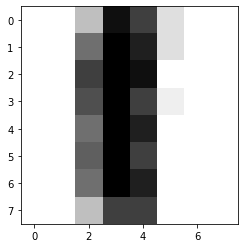

6


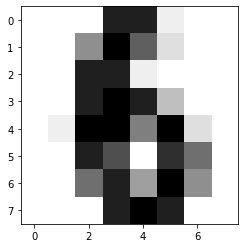

5


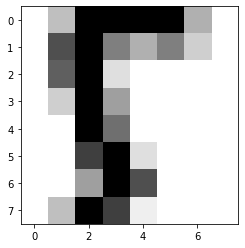

4


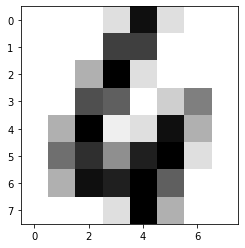

8


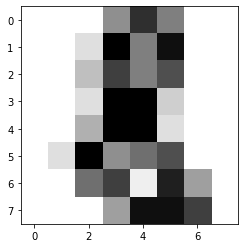

0


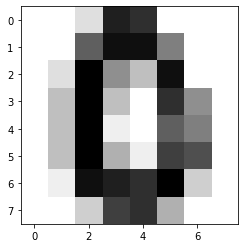

9


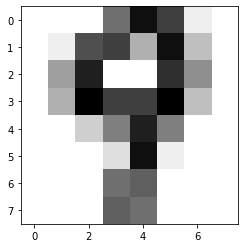

3


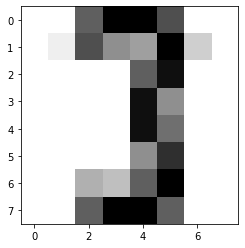

1


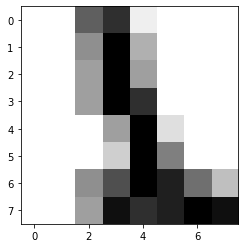

9


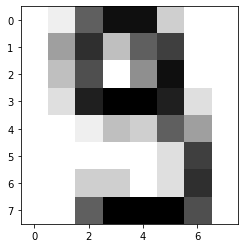

7


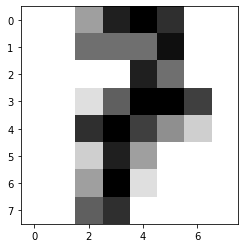

1


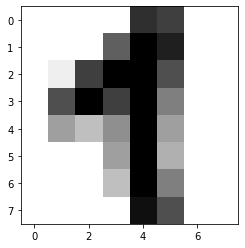

2


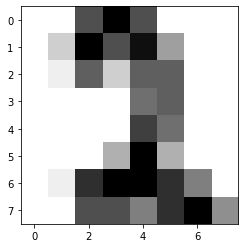

1


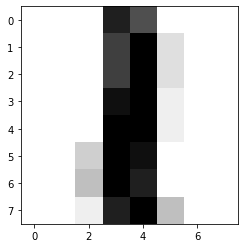

8


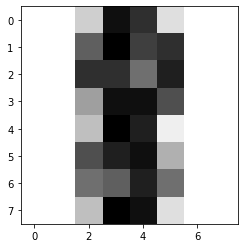

7


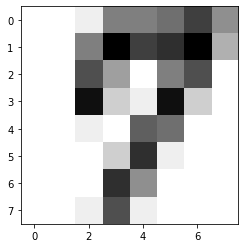

9


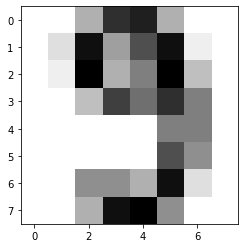

1


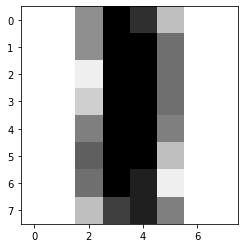

3


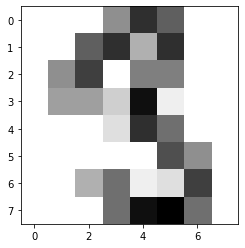

5


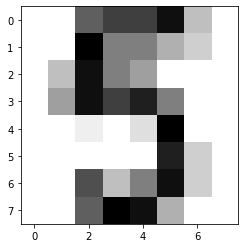

4


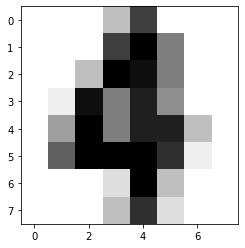

9


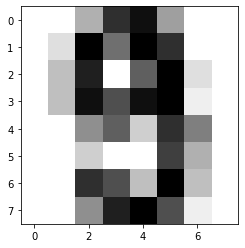

3


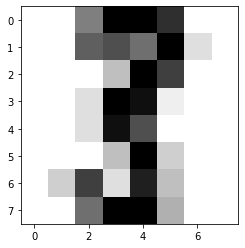

6


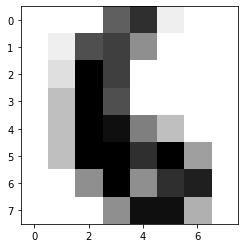

3


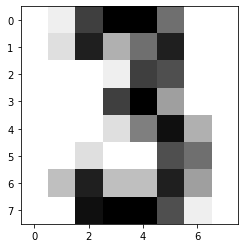

2


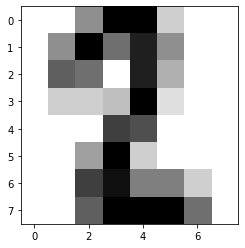

7


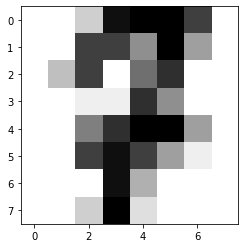

5


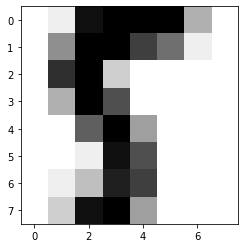

4


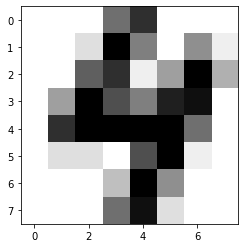

In [26]:
for digit, label in zip(X_represenative_digits, y_train[represenative_digit_idx]):
    print(label)
    digit.shape = [8,8]
    plt.imshow(digit,cmap='binary')
    plt.show()

In [27]:
# label the represenative digits by hand (saves lots of time and energy when propagated)
y_representative_digits = y_train[represenative_digit_idx]

In [28]:
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_represenative_digits, y_representative_digits)
log_reg.score(X_test,y_test)

0.9088888888888889

In [29]:
# loop over all clusters and apply the represenative data
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9355555555555556

In [30]:
# now only use the closest 20% of data to avoid miss labels
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9355555555555556

In [31]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9965397923875432

In [32]:
# DBSCAN method
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
dbscan.labels_

array([ 2,  0,  1,  1,  2,  3,  4,  3,  5,  6, -1,  7,  2,  4,  5, -1,  2,
        7, -1,  4,  4,  8,  0,  1,  7,  2,  6,  0,  6,  7,  2,  8, 10,  2,
        3,  4,  2,  7,  2,  3,  7,  8,  8,  0,  4, -1, -1,  7,  0,  1,  2,
        8,  8,  6,  2,  7,  1,  6,  3,  6,  9,  5,  6,  4,  5, -1,  8,  7,
        2,  6,  0,  8,  7,  2, -1,  3,  4,  7,  4,  3,  1,  0,  3,  4,  8,
       -1,  2,  6,  7,  3,  2,  4,  3,  8,  8,  4,  7, -1,  3,  7,  5,  5,
        2,  3,  8,  8,  4,  4,  7,  8,  0,  4,  1, -1,  2,  0, -1, -1,  2,
        4,  4,  7,  4,  0,  3,  7,  3,  4,  5,  2,  8,  0,  2,  2,  0,  9,
       -1,  3,  1,  4,  2,  4,  4,  0,  1,  5,  3,  5,  2,  2,  4,  2,  9,
        2,  7,  3, -1,  6,  8,  3,  2,  7,  3,  7,  0,  1,  3,  7,  8,  5,
        7,  2,  6,  8,  2,  8,  4,  7,  7,  2,  5,  9,  4,  7, -1,  3,  3,
        1,  0,  1,  4,  2, -1,  3,  8,  7,  8,  0,  6, -1,  1,  4,  3,  0,
        1,  4, -1,  3,  6,  6,  1,  0,  1,  2,  3, -1,  1,  7,  6,  4,  2,
        3, -1,  5,  4,  8

In [38]:
print(np.unique(dbscan.labels_))
print(len(dbscan.core_sample_indices_))
dbscan.core_sample_indices_

[-1  0  1  2  3  4  5  6  7  8  9 10]
775


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,  16,
        17,  19,  20,  21,  22,  23,  24,  27,  28,  29,  30,  31,  33,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  47,  48,  49,
        50,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  66,  67,  68,  69,  70,  72,  73,  75,  77,  79,  80,  82,
        83,  87,  88,  89,  90,  91,  92,  93,  94,  96,  98,  99, 100,
       101, 102, 103, 104, 105, 107, 108, 109, 110, 112, 114, 115, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133,
       134, 135, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 154, 155, 157, 158, 159, 160, 161, 162, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       179, 180, 182, 183, 185, 187, 188, 189, 190, 191, 193, 194, 195,
       196, 197, 198, 200, 202, 203, 204, 205, 207, 209, 210, 211, 212,
       213, 214, 216, 217, 218, 219, 220, 221, 223, 224, 225, 22

In [36]:
dbscan.components_

array([[ 0.6385991 ,  0.83998139],
       [-0.48424924,  0.90753301],
       [-0.42414788,  0.83771358],
       ...,
       [ 0.27274396, -0.1934259 ],
       [ 0.70984564,  0.73284654],
       [-1.05171612,  0.06229702]])

In [39]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
print(np.unique(dbscan.labels_))
print(len(dbscan.core_sample_indices_))
dbscan.core_sample_indices_

[0 1]
1000


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [40]:
# dbscan has no pretict() so use another method
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
# training on only core instances. Could use all or all sans anomolies
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.5,0], [0, 0.5], [1,-0.1], [2,1]])

In [41]:
knn.predict(X_new)

array([1, 0, 1, 0])

In [42]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [0.98, 0.02],
       [0.2 , 0.8 ],
       [1.  , 0.  ]])

In [44]:
# note any anomolies
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

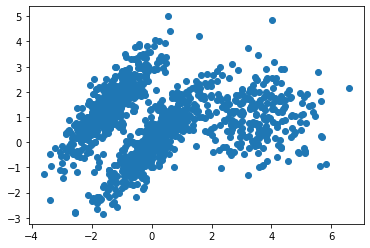

In [62]:
from sklearn.mixture import GaussianMixture

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)
plt.scatter(X[:,0], X[:,1])

In [51]:
gm.weights_

array([0.40003495, 0.20950157, 0.39046348])

In [52]:
gm.means_

array([[-1.40765333,  1.42721768],
       [ 3.40058314,  1.05927707],
       [ 0.051745  ,  0.07564271]])

In [53]:
gm.covariances_

array([[[ 0.63477309,  0.72969956],
        [ 0.72969956,  1.16080316]],

       [[ 1.14549989, -0.03285855],
        [-0.03285855,  0.9550681 ]],

       [[ 0.68877348,  0.79646998],
        [ 0.79646998,  1.21263268]]])

In [54]:
gm.converged_

True

In [55]:
gm.n_iter_

4

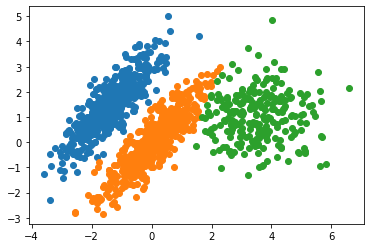

In [64]:
y_vals = gm.predict(X)
plt.scatter(X[y_vals==0,0], X[y_vals==0,1], color='C0')
plt.scatter(X[y_vals==1,0], X[y_vals==1,1], color='C1')
plt.scatter(X[y_vals==2,0], X[y_vals==2,1], color='C2')

In [57]:
gm.predict_proba(X)

array([[6.72206299e-07, 2.30278948e-02, 9.76971433e-01],
       [6.71740788e-04, 1.62478764e-02, 9.83080383e-01],
       [9.99921729e-01, 1.94720737e-06, 7.63238844e-05],
       ...,
       [2.07404700e-26, 9.99999557e-01, 4.42965233e-07],
       [1.39738028e-41, 1.00000000e+00, 5.51708677e-16],
       [7.61975061e-41, 1.00000000e+00, 2.43122788e-15]])

In [58]:
# you can sample new instances from this
X_new, y_new = gm.sample(6)
X_new

array([[-1.2514304 ,  1.54513431],
       [-2.1613365 , -0.29111041],
       [-0.51661516,  0.62172645],
       [-0.74896387, -0.80286658],
       [-1.34000234, -1.47210957],
       [ 1.13975437,  1.65693939]])

In [59]:
y_new

array([0, 0, 2, 2, 2, 2])

In [60]:
gm.score_samples(X)

array([-2.60811728, -3.57062901, -3.33084896, ..., -3.51383652,
       -4.39773899, -3.80679464])

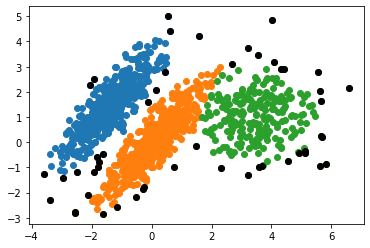

In [65]:
# detect anomalies
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
plt.scatter(X[y_vals==0,0], X[y_vals==0,1], color='C0')
plt.scatter(X[y_vals==1,0], X[y_vals==1,1], color='C1')
plt.scatter(X[y_vals==2,0], X[y_vals==2,1], color='C2')
plt.scatter(anomalies[:,0], anomalies[:,1], color='k')

In [66]:
# finding out how good the fit is
gm.bic(X)

8189.600989679593

In [67]:
gm.aic(X)

8102.375709564555

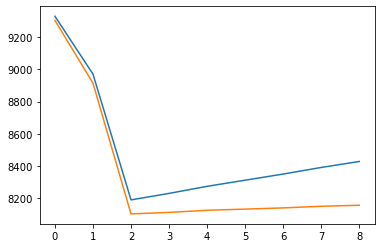

In [69]:
# sweep over clusters and find min of bic or aic
bic_data = []
aic_data = []
for k in range(1,10):
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(X)
    bic_data.append(gm.bic(X))
    aic_data.append(gm.aic(X))
plt.plot(bic_data)
plt.plot(aic_data)

In [73]:
# bayesian gaussian mixture can effectively eliminate unneeded clusters
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, max_iter=int(1e4))
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])